# Finance Data Analysis

In this data project we will focus on exploratory data analysis of stock prices.This project is just meant to practice visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

We'll focus on bank stocks and see how they progressed throughout the financial crisis.

# Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

We will need to install pandas-datareader for this to work! Pandas datareader allows us to read stock information directly from the internet. To install use pip install pandas-datareader or other required commands.


In [24]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

Data

We need to get data using pandas datareader. We will get stock information for the following banks:

Bank of America
CitiGroup
Goldman Sachs
JPMorgan Chase
Morgan Stanley
Wells Fargo


We need to figure out how to get the stock data for each of these banks. Let set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. 
This will involve a few stepsbelow steps:

Use datetime to set start and end datetime objects.
Figure out the ticker symbol for each bank.
Figure out how to use datareader to grab info on the stock.

Use this link (https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)for hints and instructions (it should just be a matter of replacing certain values. Use stooq for finance as a source.


In [2]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2018, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader("BAC", 'stooq', start, end)

# CitiGroup
C = data.DataReader("C", 'stooq', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [4]:
# We can do it for Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'stooq', start, end)

Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

We will use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

Set the column name levels.

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [8]:
bank_stocks.head()

Bank Ticker    BAC                                        C                \
Stock Info    Open     High    Low  Close     Volume   Open   High    Low   
Date                                                                        
2019-12-27   35.70  35.7200  35.26  35.35   28121039  80.00  80.18  79.58   
2019-12-26   35.32  35.5600  35.29  35.52   27007296  78.75  79.84  78.65   
2019-12-24   35.19  35.2799  35.12  35.22   13805366  78.70  78.94  78.46   
2019-12-23   35.04  35.1900  34.95  35.17   34016757  78.67  78.97  78.44   
2019-12-20   35.24  35.2400  34.91  34.96  109405592  78.94  79.05  78.04   

Bank Ticker                   ...     MS                                  \
Stock Info   Close    Volume  ...   Open   High     Low  Close    Volume   
Date                          ...                                          
2019-12-27   79.67  10867891  ...  51.33  51.33  50.925  51.09   4117109   
2019-12-26   79.83  11996442  ...  50.97  51.29  50.860  51.11   5517449   
2019-12-24   78.59   4576212  ...  50.83  50.93  50.570  50.69   2087767   
2019-12-23   78.76   9258210  ...  50.91  51.10  50.710  50.72   6547641   
2019-12-20   78.51  32019420  ...  51.44  51.44  50.660  50.69  18743335   

Bank Ticker    WFC                                  
Stock Info    Open   High     Low  Close    Volume  
Date                                                
2019-12-27   54.29  54.32  53.865  53.92   9892762  
2019-12-26   54.05  54.39  53.950  54.15  12517137  
2019-12-24   53.95  54.04  53.735  53.82   4635459  
2019-12-23   53.34  54.00  53.250  53.81  17638360  
2019-12-20   54.05  54.05  53.070  53.33  66323247  

[5 rows x 30 columns]

Let's explore the data a bit! 
What is the max Close price for each bank's stock throughout the time period?
Refer these two links : https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html

In [9]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()


Bank Ticker
BAC     35.520
C       79.830
GS     266.450
JPM    139.140
MS      56.250
WFC     61.586
dtype: float64

Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

𝑟𝑡=𝑝𝑡−𝑝𝑡−1𝑝𝑡−1=𝑝𝑡𝑝𝑡−1−1

In [10]:
returns = pd.DataFrame()

 We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [11]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2019-12-27,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-26,0.004809,0.002008,0.002384,-0.000719,0.000391,0.004266
2019-12-24,-0.008446,-0.015533,-0.005623,-0.010501,-0.008218,-0.006094
2019-12-23,-0.001420,0.002163,-0.003567,-0.002762,0.000592,-0.000186
2019-12-20,-0.005971,-0.003174,-0.000698,0.000292,-0.000591,-0.008920


Create a pairplot using seaborn of the returns dataframe

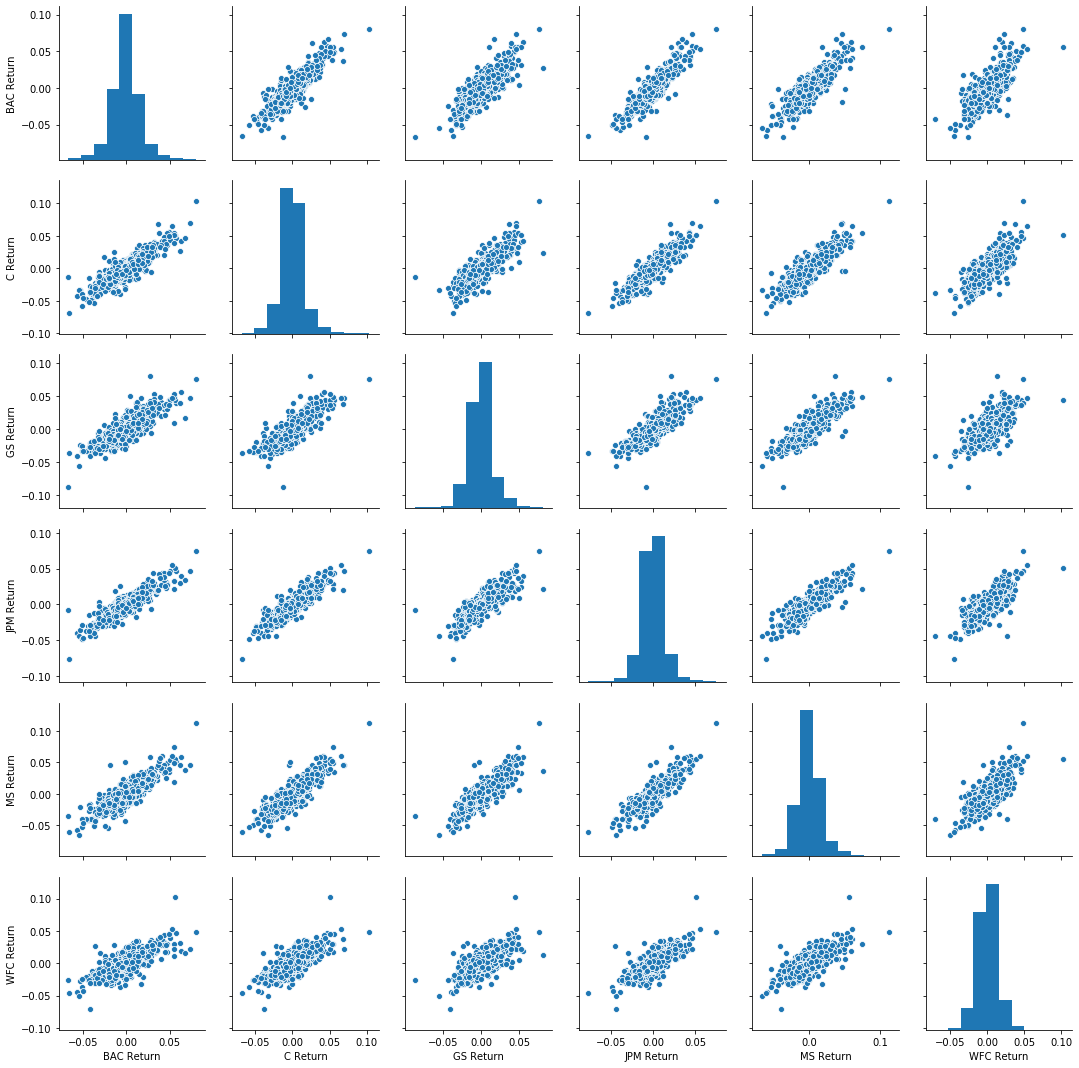

In [12]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Using this returns DataFrame, let us figure out on what dates each bank stock had the best and worst single day returns.

In [13]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2019-01-15
C Return     2016-02-11
GS Return    2019-01-15
JPM Return   2016-02-11
MS Return    2016-11-08
WFC Return   2016-11-09
dtype: datetime64[ns]

In [14]:
# Best Single Day Gain
returns.idxmax()

BAC Return   2016-06-23
C Return     2016-06-23
GS Return    2018-11-09
JPM Return   2016-06-23
MS Return    2016-06-23
WFC Return   2018-02-02
dtype: datetime64[ns]

Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? 

In [15]:
returns.std() 

BAC Return    0.016232
C Return      0.015725
GS Return     0.015048
JPM Return    0.013217
MS Return     0.016604
WFC Return    0.013314
dtype: float64

In [27]:
sns.set_style('whitegrid')


# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Create a line plot showing Close price for each bank for the entire index of time.

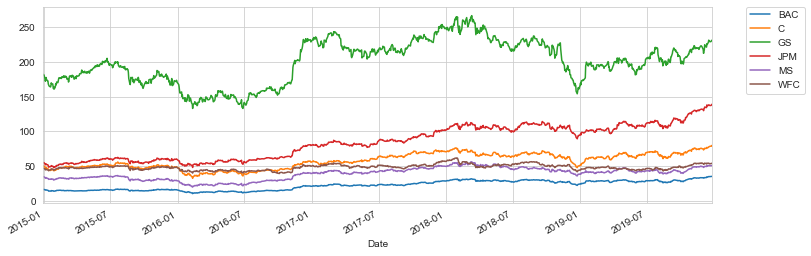

In [28]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

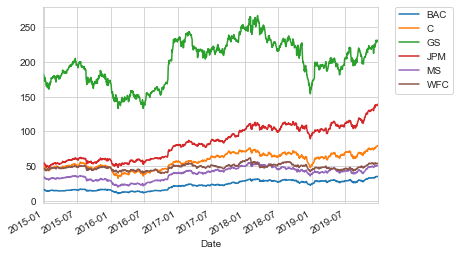

In [26]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [33]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

In [34]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

Create a heatmap of the correlation between the stocks Close Price.

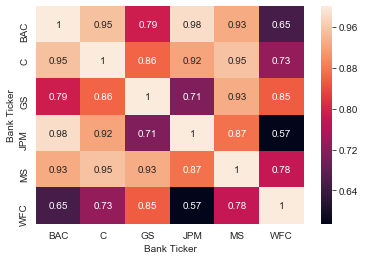

In [30]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

Seaborn's clustermap to cluster the correlations together.

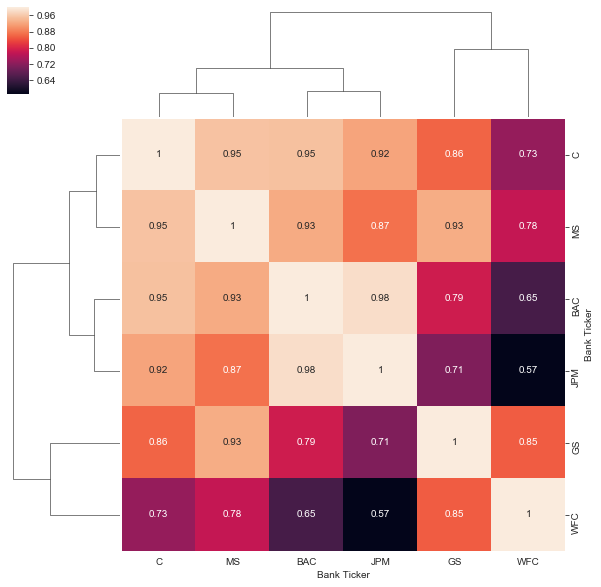

In [21]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)